<a href="https://colab.research.google.com/github/pedrorotta/Python_B-sico-/blob/main/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión lineal simple**

## ¿Qué veremos? 

  * ¿Qué es la regresión lineal simple?
  * ¿Cómo funciona una regresión lineal?  
    * ¿Cuál es el algoritmo matemático?
    * ¿Cuál es el algoritmo computacional? 
  * Ejemplo sencillo 

## ¿Qué es la regresión lineal?

Es un algoritmo que permite predecir una variable y por medio de una variable x. (**mi definición)**

La variable y normalmente se llama **target** y la variable x se llama **feature**. 



Def_oficial : Algoritmo que permite encontrar un modelo matemático de una variable dependiente (y) a partir de una variable independiente (x). 


Ejemplo : Imagina que d[texto del enlace](https://)eseas predecir :



1.   La electricidad que se consume en un recinto, teniendo en cuenta la densidad volumétrica del aire acondicionado. 

2.   El valor de inflación tomando en cuenta el valor del precio de la gasolina. 


3.  Deseas predecir la nota de un alumno, tomando en cuenta las horas que estudió.

## ¿Cómo funciona una regresión lineal?  

La idea de la regresión lineal es crear un modelo de la forma

$y = f(x) = w_1*x+b $

Donde : 

1. w_1 : Parámetro del modelo
2. b : bias => intersección con el eje x = 0

<p><img height="400px" align="center" width = "300" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Funci%C3%B3n_lineal.svg/1200px-Funci%C3%B3n_lineal.svg.png"></p>

### ¿Cuál es el algoritmo matemático?  


Primero representaré una iteración: 

1. Se selecciona un peso aleatorio w_1 y un b aleatorio. (Por ejemplo w_1 = 0 y b = 0) 
 * Si esto es así el modelo se vuelve : 
$y = 0*x + 0$. Es decir : $y = x$     
2. Se calcula el valor de todos los target. (Esto sería un entrenamiento de la red) 
3. Se calcula el valor del error cuadrático medio. 
  * ¿Es el error cercano a 0? Si la rpta es sí entonces, se finaliza, si es no, se continúa con el paso 4 
  * ¿Estamos en el límite de las iteraciones permitidas?  Si es sí se finaliza, si es no se continúa con el paso 4. 
4. Se modifica el parámetro w_1 y el valor de b con ayuda del error.
5. Se procede con el paso 2. 

### ¿Cuál es el algoritmo computacional?

1. Se selecciona el feature (x) y el target(y)
2. Los datos observables se separan en 2 grupos: De entrenamiento y de validación. 
3. Se procede a realizar el algoritmo de entrenamiento (En una sola linea de código se procesa todo el algortimo matemático)
4. Se evalúa el modelo obtenido. 

## Ejemplo sencillo:

In [3]:
# Importamos librerías 
import numpy as np 
import matplotlib.pyplot as plt
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
def gen_data(n, bias, varianza):
    x = []
    y = []
    for i in range(0, n):
        x.append(i)
        y.append((2*i + bias) + random.uniform(0, 1) * varianza)
    return x, y

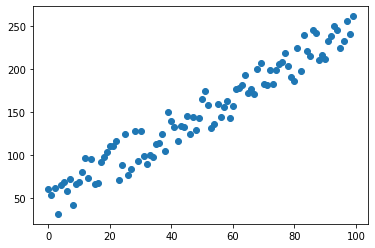

In [9]:
#Seleccionamos x & y 
x,y = gen_data(100, 25, 50)
plt.scatter(x, y)
plt.show()

In [10]:
# separamos el conjunto de datos en 2 grupos : Entrenamiento (70-80%) y validación (30%-20%)

In [15]:
x_train = (np.array(x[0:70])).reshape(70,1)
y_train = (np.array(y[0:70])).reshape(70,1)
x_test = (np.array(x[70:])).reshape(30,1)
y_test = (np.array(y[70:])).reshape(30,1)


In [18]:
modelo1 = linear_model.LinearRegression()

In [23]:
fit1 = modelo1.fit(x_train,y_train)

[[1.91298691]]
[51.9472324]
0.6169734276647432
198.27712234532245


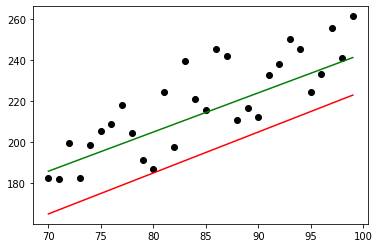

In [38]:
# EVALUAR EL MODELO
print(modelo1.coef_)
print(modelo1.intercept_)
y_predicho = modelo1.predict(x_test)
print(r2_score(y_test, y_predicho))
print(mean_squared_error(y_test, y_predicho))
plt.scatter(x_test,y_test, color = "black")
plt.plot(x_test,y_predicho, color = "green")
y_recta = 2*x_test + 25
plt.plot(x_test,y_recta, color =  "red")
plt.show()

In [40]:
modelo1.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}